<a href="https://colab.research.google.com/github/Triniti0/klasifikasi-penyakit-daun-cabai/blob/main/Model_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from

Mounted at /content/drive


In [ ]:
EXPERIMENT_NAME = "Baseline"
BASE_SAVE_DIR = "/content/drive/MyDrive/Experiments"

SAVE_DIR = os.path.join(BASE_SAVE_DIR, EXPERIMENT_NAME)
os.makedirs(SAVE_DIR, exist_ok=True)

MODEL_PATH = os.path.join(SAVE_DIR, "Baseline_Model.h5")

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Seminar Hasil/dataset_processed/train",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Seminar Hasil/dataset_processed/val",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Seminar Hasil/dataset_processed/test",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)

def preprocess(x, y):
    return preprocess_input(x), y

train_ds = train_ds.map(preprocess).prefetch(AUTOTUNE)
val_ds = val_ds.map(preprocess).prefetch(AUTOTUNE)
test_ds = test_ds.map(preprocess).prefetch(AUTOTUNE)

Found 11704 files belonging to 8 classes.
Found 617 files belonging to 8 classes.
Found 620 files belonging to 8 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze semua conv layer
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=1e-4,
    momentum=0.9
)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    steps_per_epoch=48
)

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.1509 - loss: 2.4498 - val_accuracy: 0.2188 - val_loss: 1.9597
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.2235 - loss: 2.0157 - val_accuracy: 0.2707 - val_loss: 1.8634
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.3719 - loss: 1.7658 - val_accuracy: 0.3614 - val_loss: 1.7268
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.3874 - loss: 1.6698 - val_accuracy: 0.4571 - val_loss: 1.6221
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.4321 - loss: 1.5818 - val_accuracy: 0.5024 - val_loss: 1.5359
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.4859 - loss: 1.4435 - val_accuracy: 0.5446 - val_loss: 1.4688
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.5518 - loss: 1.3600 - val_accuracy: 0.5802 - val_loss: 1.3851
Epoch 8/30
30/48 ━━━━━━━━━━━━━━━━━━━━ 1:02 3s/step - accuracy: 0.5378 - loss: 1.3133

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


48/48 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5492 - loss: 1.2997 - val_accuracy: 0.6062 - val_loss: 1.3382
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6333 - loss: 1.1973 - val_accuracy: 0.6856 - val_loss: 1.2259
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6477 - loss: 1.1676 - val_accuracy: 0.6823 - val_loss: 1.1939
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6609 - loss: 1.0835 - val_accuracy: 0.7472 - val_loss: 1.1005
Epoch 12/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6853 - loss: 1.0596 - val_accuracy: 0.7812 - val_loss: 1.0391
Epoch 13/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6779 - loss: 1.0354 - val_accuracy: 0.7828 - val_loss: 0.9992
Epoch 14/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7040 - loss: 0.9605 - val_accuracy: 0.7796 - val_loss: 0.9601
Epoch 15/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7484 - loss: 0.8801 - val_accuracy: 0.7958 - val_lo

In [ ]:
model.save(MODEL_PATH)
print("Baseline model saved.")

Baseline model saved.


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Baseline Test Accuracy:", test_acc)

import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Get true labels
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Get predictions
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate Macro F1 Score
macro_f1 = f1_score(true_labels, predicted_labels, average='macro')
print("Macro F1 Score:", macro_f1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8720 - loss: 0.5509
Baseline Test Accuracy: 0.8725806474685669
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Macro F1 Score: 0.8189765196461625


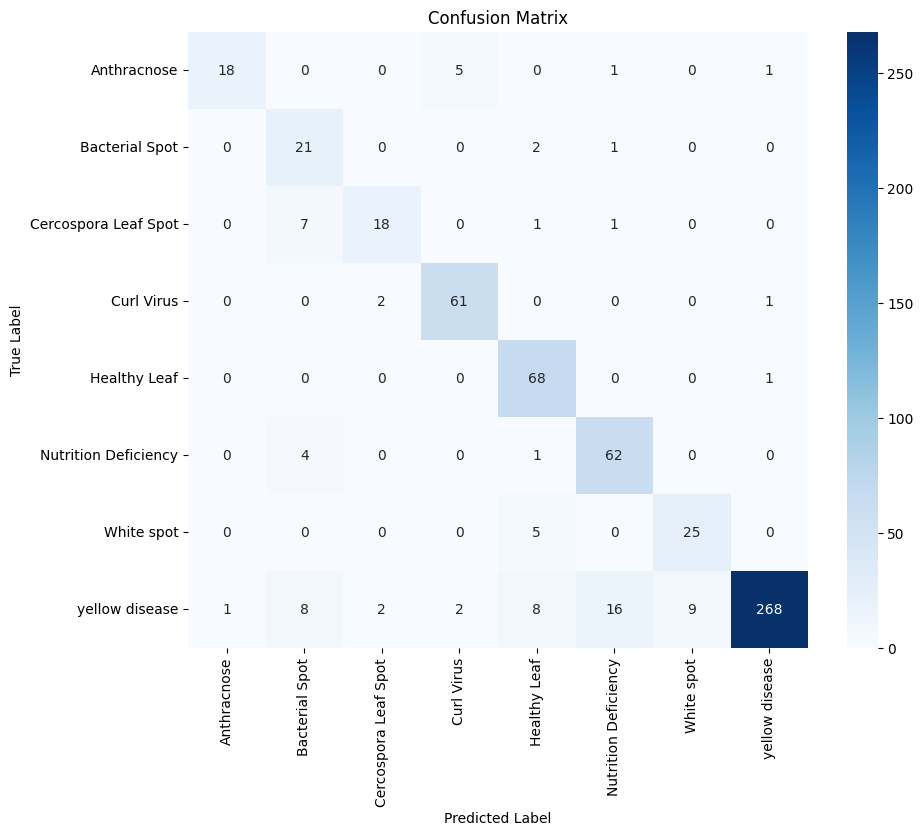

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import time

#waktu inferensi
sample = next(iter(test_ds))[0]

start = time.time()
_ = model.predict(sample)
inference_time = (time.time() - start) / len(sample)

print("Inference Time per Image:", inference_time)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Inference Time per Image: 0.12973958998918533


In [ ]:
#ukuran file model
size_mb = os.path.getsize(MODEL_PATH) / (1024*1024)
print("Model Size (MB):", size_mb)

Model Size (MB): 10.387863159179688
